In [12]:
# @title 5) Inicio da normalização e Balanceamento dos dados
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import cdist
from pickle import dump, load
import os
from pprint import pprint

# Carregar dados do arquivo gerado anteriormente (_Raw)
dados = pd.read_csv("Databases/PDACCTRL_samplesXfeatures_RAW.csv")
print("Dados carregados:", dados.shape)
dados

Dados carregados: (107, 2581)


,Sample_ID,Grupo,MIMAT0000062_st,MIMAT0000063_st,MIMAT0000064_st,MIMAT0000065_st,MIMAT0000066_st,MIMAT0000067_st,MIMAT0000068_st,MIMAT0000069_st,...,MIMAT0031119_st,MIMAT0031120_st,MIMAT0031175_st,MIMAT0031176_st,MIMAT0031177_st,MIMAT0031178_st,MIMAT0031179_st,MIMAT0031180_st,MIMAT0031181_st,y
0,GSM2278612,PDAC,1.129491,5.508052,2.923399,1.751963,0.693354,0.750790,0.685247,5.234038,...,0.913821,0.660219,0.484359,0.954552,1.271430,1.405966,0.597030,0.935637,0.930258,1
1,GSM2278613,PDAC,1.727870,7.021726,4.075586,1.692451,0.748297,0.819648,1.228891,3.863134,...,0.572489,0.288395,0.911395,0.865855,1.191414,1.248563,0.880128,0.443996,0.461034,1
2,GSM2278614,PDAC,1.275866,5.847073,4.037849,1.675842,0.792464,0.854456,0.427473,5.030710,...,0.567179,0.585677,0.968250,0.416603,0.906936,0.515170,0.373492,1.029657,0.783717,1
3,GSM2278615,PDAC,1.231164,5.372768,3.634441,1.629729,0.835388,0.508545,0.633179,4.395977,...,0.606826,0.616086,0.910045,0.485816,0.481710,0.658906,0.486607,1.092210,0.877583,1
4,GSM2278616,PDAC,1.598425,5.448495,3.763625,1.970805,0.652223,0.442908,0.477028,4.051217,...,0.798609,0.780584,0.655019,0.591214,1.120507,1.493095,0.723840,0.936191,0.714010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,GSM2278758,Controle,1.072158,6.132864,4.303285,1.466693,1.066174,0.743631,0.542135,4.761716,...,0.565492,0.494150,0.605459,0.665845,1.061685,0.433729,0.351924,0.844252,0.267246,0
103,GSM2278759,Controle,1.688142,5.986205,3.848825,2.162682,0.984778,0.885241,0.934689,4.002943,...,0.829502,0.562959,1.029765,0.616121,0.528186,1.066021,0.886998,0.823196,0.621138,0
104,GSM2278760,Controle,1.507370,5.871728,3.430393,1.897419,0.627474,0.908978,0.458824,4.791717,...,1.177363,0.819254,0.368961,0.541980,1.179273,0.513666,0.789142,1.221342,0.959684,0
105,GSM2278761,Controle,0.588391,6.057384,4.142099,1.870668,1.081216,0.611892,0.771683,5.097688,...,0.604917,0.446808,0.563384,0.238049,0.932333,0.753658,0.141102,1.277319,0.443357,0


In [13]:
#normalizar
dados_num = dados.drop(columns=["Sample_ID", "Grupo", "y"])
dados_cat = dados[["Grupo"]]

#Instanciar o objeto normalizador
normalizador = preprocessing.MinMaxScaler()

#treinar o modelo normalizador
modelo_normalizador_num = normalizador.fit(dados_num)

#Salvando modelo normalizador para uso posterior
os.makedirs('models', exist_ok=True)
dump(modelo_normalizador_num, open("models/normalizador_TCC_Mirnas_Test.model", "wb"))

#normalizar os atributos numericos
dados_num_normalizado = modelo_normalizador_num.fit_transform(dados_num)

#Normalizar os dados Categoricos
dados_cat_normalizado = pd.get_dummies(data=dados_cat, dtype='int')

#Recompor dados -> unir atributos num e cat que foram normalizados
dados_num = pd.DataFrame(dados_num_normalizado, columns=dados_num.columns)
dados = dados_num.join(dados_cat_normalizado)
dados

,MIMAT0000062_st,MIMAT0000063_st,MIMAT0000064_st,MIMAT0000065_st,MIMAT0000066_st,MIMAT0000067_st,MIMAT0000068_st,MIMAT0000069_st,MIMAT0000070_st,MIMAT0000071_st,...,MIMAT0031120_st,MIMAT0031175_st,MIMAT0031176_st,MIMAT0031177_st,MIMAT0031178_st,MIMAT0031179_st,MIMAT0031180_st,MIMAT0031181_st,Grupo_Controle,Grupo_PDAC
0,0.364020,0.616390,0.295100,0.357728,0.346143,0.246612,0.281153,0.791741,0.567829,0.293147,...,0.371438,0.318945,0.485705,0.572516,0.820679,0.450881,0.418451,0.829685,0,1
1,0.566594,0.930115,0.621546,0.339320,0.389451,0.274622,0.596963,0.371203,0.940650,0.244754,...,0.057091,0.753015,0.430443,0.524971,0.710573,0.730846,0.132892,0.395607,0,1
2,0.413573,0.686656,0.610854,0.334182,0.424265,0.288782,0.131408,0.729368,0.610426,0.575846,...,0.308419,0.810807,0.150539,0.355937,0.197553,0.229818,0.473060,0.694120,0,1
3,0.398440,0.588351,0.496557,0.319919,0.458100,0.148070,0.250906,0.534658,0.831239,0.250591,...,0.334126,0.751642,0.193662,0.103271,0.298098,0.341681,0.509392,0.780955,0,1
4,0.522772,0.604046,0.533159,0.425419,0.313721,0.121369,0.160196,0.428900,1.000000,0.237128,...,0.473196,0.492416,0.259330,0.482838,0.881627,0.576288,0.418772,0.629635,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.344610,0.745889,0.686059,0.269489,0.640015,0.243700,0.198017,0.646852,0.622801,0.311664,...,0.231040,0.442040,0.305828,0.447887,0.140583,0.208489,0.365372,0.216334,1,0
103,0.553144,0.715492,0.557298,0.484770,0.575855,0.301305,0.426057,0.414091,0.457515,0.127880,...,0.289213,0.873334,0.274848,0.130887,0.582882,0.737640,0.353141,0.543719,1,0
104,0.491946,0.691766,0.438745,0.402720,0.294213,0.310961,0.149621,0.656055,0.669959,0.330950,...,0.505888,0.201646,0.228655,0.517757,0.196500,0.640867,0.584396,0.856907,1,0
105,0.180837,0.730245,0.640391,0.394445,0.651872,0.190110,0.331365,0.749914,0.581655,0.119255,...,0.191017,0.399272,0.039293,0.371028,0.364379,0.000000,0.616909,0.379254,1,0


In [14]:
#Balancear - Separar a base em atributos e a Classe (Nesse caso se possui o câncer de pancreas ou não)
dados_atributos = dados.drop(columns= ["Grupo_PDAC", "Grupo_Controle"])
dados_classe = dados["Grupo_PDAC"]
resampler = SMOTE()

dados_atributos_b, dados_classe_b = resampler.fit_resample(dados_atributos, dados_classe)

classes_count = Counter(dados_classe_b)
dados_atributos_b

,MIMAT0000062_st,MIMAT0000063_st,MIMAT0000064_st,MIMAT0000065_st,MIMAT0000066_st,MIMAT0000067_st,MIMAT0000068_st,MIMAT0000069_st,MIMAT0000070_st,MIMAT0000071_st,...,MIMAT0031095_st,MIMAT0031119_st,MIMAT0031120_st,MIMAT0031175_st,MIMAT0031176_st,MIMAT0031177_st,MIMAT0031178_st,MIMAT0031179_st,MIMAT0031180_st,MIMAT0031181_st
0,0.364020,0.616390,0.295100,0.357728,0.346143,0.246612,0.281153,0.791741,0.567829,0.293147,...,0.285385,0.633681,0.371438,0.318945,0.485705,0.572516,0.820679,0.450881,0.418451,0.829685
1,0.566594,0.930115,0.621546,0.339320,0.389451,0.274622,0.596963,0.371203,0.940650,0.244754,...,0.280260,0.329628,0.057091,0.753015,0.430443,0.524971,0.710573,0.730846,0.132892,0.395607
2,0.413573,0.686656,0.610854,0.334182,0.424265,0.288782,0.131408,0.729368,0.610426,0.575846,...,0.474944,0.324899,0.308419,0.810807,0.150539,0.355937,0.197553,0.229818,0.473060,0.694120
3,0.398440,0.588351,0.496557,0.319919,0.458100,0.148070,0.250906,0.534658,0.831239,0.250591,...,0.413181,0.360215,0.334126,0.751642,0.193662,0.103271,0.298098,0.341681,0.509392,0.780955
4,0.522772,0.604046,0.533159,0.425419,0.313721,0.121369,0.160196,0.428900,1.000000,0.237128,...,0.905913,0.531052,0.473196,0.492416,0.259330,0.482838,0.881627,0.576288,0.418772,0.629635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.447486,0.782936,0.496684,0.368302,0.243750,0.178999,0.090794,0.570388,0.679906,0.234260,...,0.646190,0.827956,0.662993,0.813122,0.205926,0.179229,0.399656,0.283741,0.470443,0.651699
172,0.793138,0.749745,0.540081,0.463033,0.459281,0.214246,0.299125,0.420744,0.631455,0.301234,...,0.429790,0.494975,0.424918,0.700073,0.357381,0.209351,0.365722,0.759084,0.200796,0.309266
173,0.607927,0.764295,0.564184,0.567063,0.381203,0.212866,0.278986,0.657340,0.478397,0.451576,...,0.441993,0.583892,0.408090,0.414872,0.391008,0.397428,0.234429,0.501414,0.563723,0.714763
174,0.428414,0.613223,0.633344,0.401763,0.368910,0.201972,0.223375,0.746915,0.489133,0.258247,...,0.621429,0.454511,0.267977,0.301564,0.477107,0.201798,0.128341,0.611698,0.523602,0.661303


In [15]:
#preparar para treinamento não supervisionado
#1- Lembrar que os dados numericos ja estao normalizados
#2- Normalizar o atributo diagnostico
#3- Verificar o tipo do objeto de dados (Type)
type(dados_classe_b) # Pandas.core.Series

#Como objeto e um Pandas series, converter em Dataframe pois getdummys so funciona em dataframe
dados_classe_b = pd.DataFrame(dados_classe_b)
#Normalizar o atributo Diagnosico do Dataframe
dados_classe_normalizado = pd.get_dummies(data= dados_classe_b)

#recompor o arquivo de dados com os atributos e classes balanceados
dados= dados_atributos_b.join(dados_classe_normalizado)
dados

,MIMAT0000062_st,MIMAT0000063_st,MIMAT0000064_st,MIMAT0000065_st,MIMAT0000066_st,MIMAT0000067_st,MIMAT0000068_st,MIMAT0000069_st,MIMAT0000070_st,MIMAT0000071_st,...,MIMAT0031119_st,MIMAT0031120_st,MIMAT0031175_st,MIMAT0031176_st,MIMAT0031177_st,MIMAT0031178_st,MIMAT0031179_st,MIMAT0031180_st,MIMAT0031181_st,Grupo_PDAC
0,0.364020,0.616390,0.295100,0.357728,0.346143,0.246612,0.281153,0.791741,0.567829,0.293147,...,0.633681,0.371438,0.318945,0.485705,0.572516,0.820679,0.450881,0.418451,0.829685,1
1,0.566594,0.930115,0.621546,0.339320,0.389451,0.274622,0.596963,0.371203,0.940650,0.244754,...,0.329628,0.057091,0.753015,0.430443,0.524971,0.710573,0.730846,0.132892,0.395607,1
2,0.413573,0.686656,0.610854,0.334182,0.424265,0.288782,0.131408,0.729368,0.610426,0.575846,...,0.324899,0.308419,0.810807,0.150539,0.355937,0.197553,0.229818,0.473060,0.694120,1
3,0.398440,0.588351,0.496557,0.319919,0.458100,0.148070,0.250906,0.534658,0.831239,0.250591,...,0.360215,0.334126,0.751642,0.193662,0.103271,0.298098,0.341681,0.509392,0.780955,1
4,0.522772,0.604046,0.533159,0.425419,0.313721,0.121369,0.160196,0.428900,1.000000,0.237128,...,0.531052,0.473196,0.492416,0.259330,0.482838,0.881627,0.576288,0.418772,0.629635,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.447486,0.782936,0.496684,0.368302,0.243750,0.178999,0.090794,0.570388,0.679906,0.234260,...,0.827956,0.662993,0.813122,0.205926,0.179229,0.399656,0.283741,0.470443,0.651699,0
172,0.793138,0.749745,0.540081,0.463033,0.459281,0.214246,0.299125,0.420744,0.631455,0.301234,...,0.494975,0.424918,0.700073,0.357381,0.209351,0.365722,0.759084,0.200796,0.309266,0
173,0.607927,0.764295,0.564184,0.567063,0.381203,0.212866,0.278986,0.657340,0.478397,0.451576,...,0.583892,0.408090,0.414872,0.391008,0.397428,0.234429,0.501414,0.563723,0.714763,0
174,0.428414,0.613223,0.633344,0.401763,0.368910,0.201972,0.223375,0.746915,0.489133,0.258247,...,0.454511,0.267977,0.301564,0.477107,0.201798,0.128341,0.611698,0.523602,0.661303,0


In [26]:
#Treinamento n supervisionado
#1 determinar o numero otimo de clusters

distorcoes = [] #Matriz para armazenar distorções
K = range(1, 10) # intervalo de clusters, para testar e alcançar numero otimo

#treina, calcula distorção, treina, calcula distorção....

for i in K:
    cluster_model = KMeans(n_clusters=i, random_state=42).fit(dados)
    distorcoes.append(
        sum(np.min(cdist(dados, cluster_model.cluster_centers_, "euclidean"), axis=1)) / dados.shape[0]
    )

print(distorcoes)

[8.933949545213677, 8.877713031773462, 8.822182531694722, 8.629165378671646, 8.44506839420026, 8.391147043781327, 8.333625726545812, 8.01258320494455, 7.958989532906653]


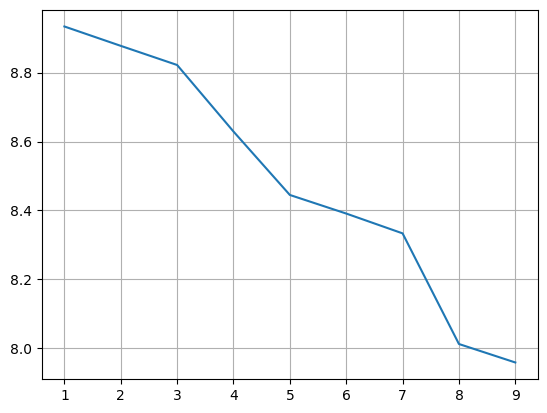

In [27]:
#Gerar um gráfico com as distorções
fig, ax = plt.subplots() # criar um objeto p/ plotar gráfico
ax.plot(K, distorcoes) #Valores de K no eixo X e valores de Distorcoes no eixo Y
ax.grid()
fig.savefig('elbow_distorcoes1.png')
plt.show()

In [28]:
#Determinar o numero otimo de grupos p/ o modelo
x0 = K[0]
y0 = distorcoes[0]
xn = K[len(K)-1]
yn = distorcoes[len(distorcoes)-1]
distancias = []

#Laço que repete o equivalente ao tamanho das distorções
for i in range(len(distorcoes)):
  x= K[i]
  y= distorcoes[i]
  numerador = abs((yn-y0)*x - (xn-x0)*y + xn*y0 - yn*x0)

  denominador = math.sqrt((yn-y0)**2 + (xn-x0)**2)

  distancias.append(numerador/denominador)

n_cluster_otimo= K[distancias.index(np.max(distancias))]
n_cluster_otimo

3

In [29]:
#Treinar o modelo de cluster definitamente
fertility_cluster = KMeans(n_clusters=n_cluster_otimo, random_state=42).fit(dados)

#Salvar o modelo treinado para uso posterior
dump(fertility_cluster, open('models/TCC_Mirnas.model', 'wb'))

#quais sao os valores dos nossos centroides
print("Centroides do modelo:")
print(fertility_cluster.cluster_centers_)

Centroides do modelo:
[[0.4902255  0.84789289 1.         ... 1.         0.30584751 1.        ]
 [0.48176162 0.67759507 0.52215814 ... 0.42643018 0.51418802 0.49425287]
 [0.63961075 0.67279905 0.65761654 ... 0.72681431 0.43712537 1.        ]]


Iniciando pré-processamento e análise...
Features selecionadas: 20
K-Means treinado com 3 clusters.
PCA treinado e dados projetados. Variância Explicada: 64.13%


c:\Users\cassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


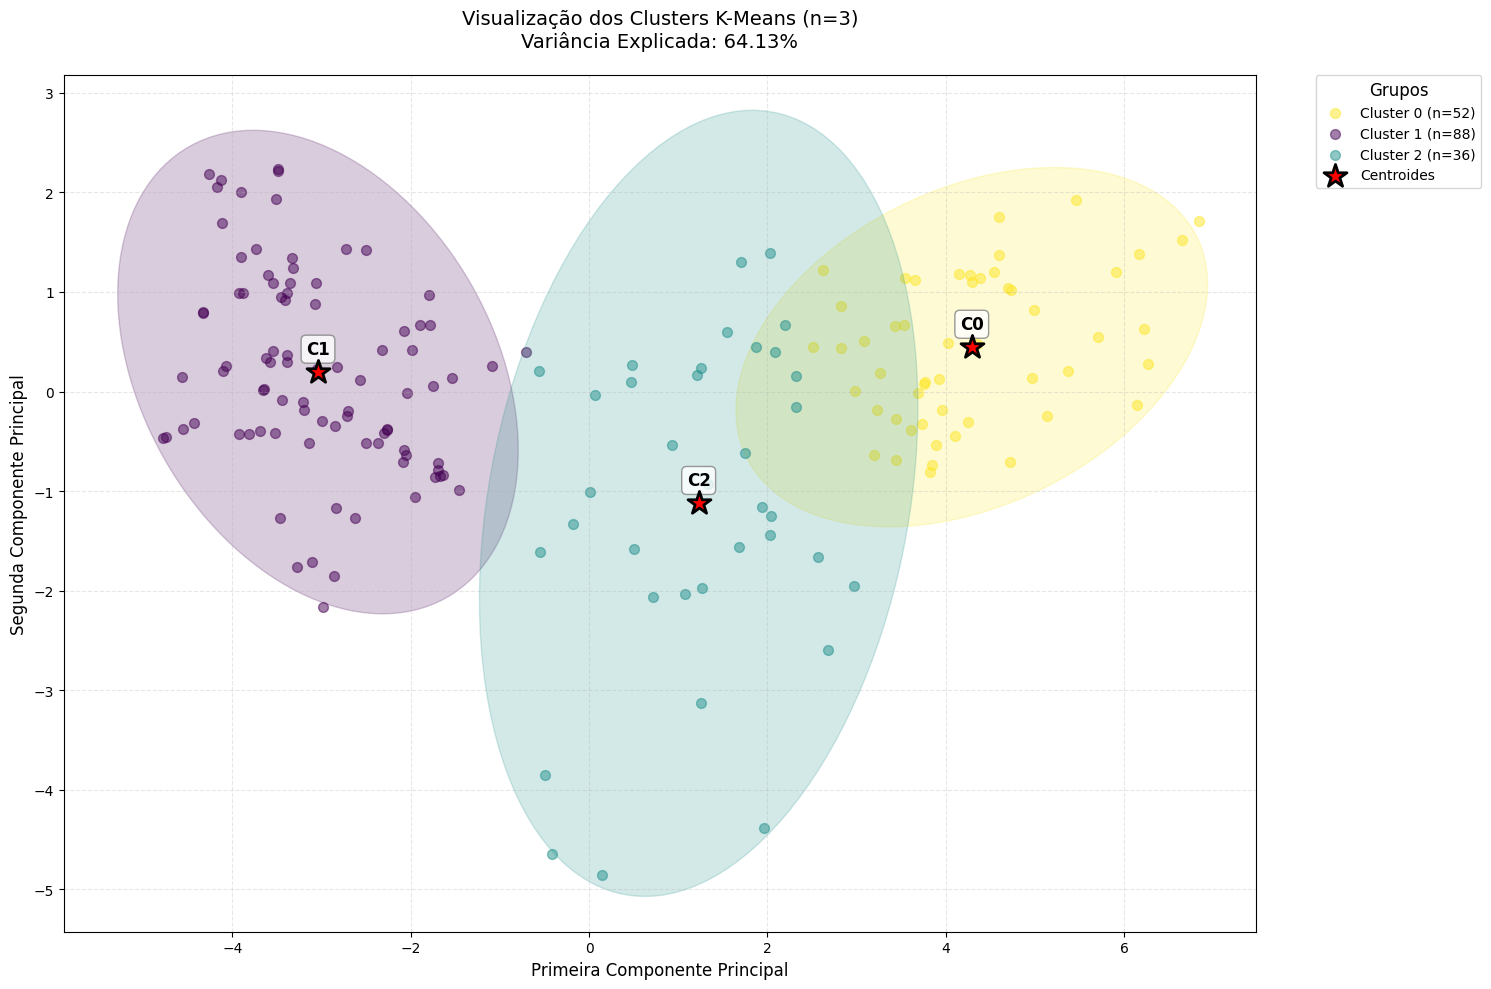

In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

# --- 0. Funções Auxiliares (Definição da Elipse) ---

def plot_covariance_ellipse(ax, center, cov, confidence=0.95, **kwargs):
    """Desenha uma elipse que representa a dispersão de um cluster em 2D."""
    # Garantir ndarray e tipo float
    cov = np.array(cov, dtype=float)

    # Pequena regularização para evitar matrizes semi-definitas negativas por erro numérico
    cov = cov + np.eye(cov.shape[0]) * 1e-8

    # Para matrizes simétricas use eigh (mais estável) -> autovalores e autovetores
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Evitar autovalores negativos por ruído numérico
    eigvals = np.clip(eigvals, a_min=0.0, a_max=None)

    # Ordenar do maior para o menor
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    # Fator de escala baseado na confiança (chi2 para 2 graus de liberdade).
    # usar a equivalência -2*ln(1-p) evita dependência do scipy.
    scale_factor = np.sqrt(-2 * np.log(1 - confidence))

    # Largura/altura da elipse = 2 * escala * sigma (sigma = sqrt(eigvals))
    width = 2.0 * np.sqrt(eigvals[0]) * scale_factor
    height = 2.0 * np.sqrt(eigvals[1]) * scale_factor

    # Ângulo da elipse (em graus) a partir do primeiro autovetor usando atan2 -> estável
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))

    ell = Ellipse(xy=center, width=width, height=height, angle=angle, **kwargs)
    return ax.add_patch(ell)


# --- 1. Pré-processamento e Seleção de Features ---

print("Iniciando pré-processamento e análise...")

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados_atributos_b)

# Selecionar features mais importantes (se dados_classe_b estiver disponível)
if 'dados_classe_b' in globals():
    selector = SelectKBest(score_func=f_classif, k=20)  # seleciona top 20 features
    X_selected = selector.fit_transform(X_scaled, dados_classe_b)
    selected_features_mask = selector.get_support()
    selected_features = dados_atributos_b.columns[selected_features_mask]
    print(f"Features selecionadas: {len(selected_features)}")
else:
    X_selected = X_scaled
    print("Usando todas as features (dados_classe_b não disponível)")

# --- 2. Re-treinar K-Means e PCA com Features Selecionadas ---

# K-Means nos dados selecionados
fertility_cluster = KMeans(n_clusters=n_cluster_otimo, random_state=42, n_init=10).fit(X_selected)
cluster_labels = fertility_cluster.labels_
n_clusters = fertility_cluster.n_clusters

# PCA nos dados selecionados
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(X_selected)
centroides_pca = pca.transform(fertility_cluster.cluster_centers_)

print(f"K-Means treinado com {n_clusters} clusters.")
print(f"PCA treinado e dados projetados. Variância Explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# --- 3. Geração do Gráfico Melhorado ---

plt.figure(figsize=(15, 10))
ax = plt.gca()

# Criar um colormap personalizado
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
np.random.shuffle(colors)  # misturar cores para melhor contraste

# 3.1 Desenhar Amostras e Elipses
for i in range(n_clusters):
    cluster_data = dados_pca[cluster_labels == i]
    
    if len(cluster_data) < 2:
        print(f"Aviso: Cluster {i} tem apenas {len(cluster_data)} amostra(s). Elipse ignorada.")
        if len(cluster_data) == 1:
            ax.scatter(cluster_data[:, 0], cluster_data[:, 1],
                      color=colors[i], alpha=0.8, s=100, marker='s',
                      label=f'Cluster {i} (1 Amostra)')
        continue

    # Plotar amostras com transparência
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1],
              color=colors[i], alpha=0.5, s=50,
              label=f'Cluster {i} (n={len(cluster_data)})')

    # Calcular e desenhar elipse
    center = np.mean(cluster_data, axis=0)
    cov_matrix = np.cov(cluster_data, rowvar=False)
    
    plot_covariance_ellipse(ax, center, cov_matrix,
                           alpha=0.2, facecolor=colors[i], edgecolor=colors[i])

# 3.2 Plotar Centroides
ax.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
          marker='*', s=300, color='red', edgecolor='black',
          linewidth=2, zorder=10, label='Centroides')

# 3.3 Anotações dos Centroides
for i in range(n_clusters):
    ax.annotate(f'C{i}',
               (centroides_pca[i, 0], centroides_pca[i, 1]),
               textcoords="offset points", xytext=(0,10),
               ha='center', va='bottom',
               fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# 3.4 Finalização do Plot
title = f'Visualização dos Clusters K-Means (n={n_clusters})\n'
title += f'Variância Explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%'
ax.set_title(title, pad=20, fontsize=14)
ax.set_xlabel('Primeira Componente Principal', fontsize=12)
ax.set_ylabel('Segunda Componente Principal', fontsize=12)

# Ajustar legenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
         title='Grupos', title_fontsize=12)

# Adicionar grid e ajustar layout
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Salvar o modelo (opcional)
dump(fertility_cluster, open('models/TCC_Mirnas.model', 'wb'))

Shape original dos dados: (176, 2578)


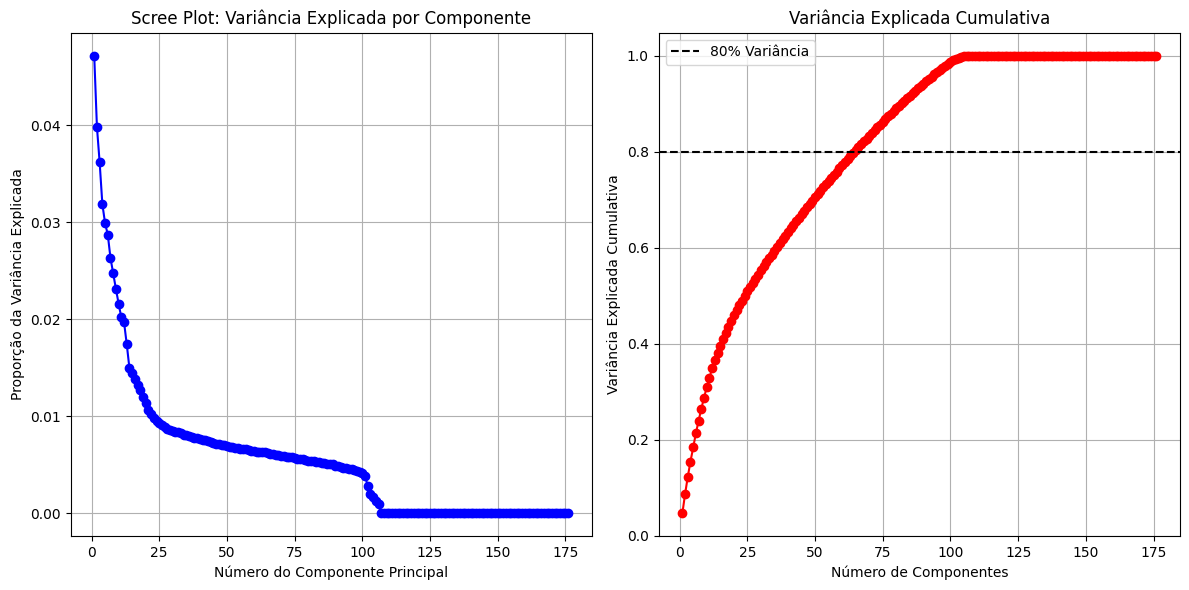

Componentes necessários para 70.0% da variância: 50
Componentes necessários para 80.0% da variância: 65
Componentes necessários para 90.0% da variância: 82

Top 10 features mais importantes:
              Feature       Score
1100  MIMAT0017991_st  259.824203
1481  MIMAT0019745_st  250.567430
997   MIMAT0015086_st  241.827735
1233  MIMAT0018938_st  225.300300
200   MIMAT0000773_st  179.776560
357   MIMAT0003251_st  176.674921
2561  MIMAT0031011_st  149.046395
137   MIMAT0000646_st  144.636190
500   MIMAT0004518_st  134.942312
2086  MIMAT0026641_st  134.676699

Variância explicada com 100 features selecionadas: 39.33%

Contribuição das features para os 2 primeiros componentes:

Componente 1 - Top 5 features:
MIMAT0017991_st    0.071222
MIMAT0015086_st    0.069792
MIMAT0019745_st    0.067884
MIMAT0031011_st    0.067392
MIMAT0003251_st    0.067102
Name: 0, dtype: float64

Componente 2 - Top 5 features:
MIMAT0002828_st    0.058509
MIMAT0027430_st    0.056802
MIMAT0003244_st    0.055582
MIMA

c:\Users\cassi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# @title Análise da Variância Explicada e Melhorias no PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Preparar os dados
print("Shape original dos dados:", dados_atributos_b.shape)

# 2. Padronizar os dados (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dados_atributos_b)

# 3. Análise completa do PCA
pca_full = PCA()
pca_full.fit(X_scaled)

# 4. Calcular variância explicada cumulativa
var_ratio = pca_full.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

# 5. Plotar Scree Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(var_ratio) + 1), var_ratio, 'bo-')
plt.title('Scree Plot: Variância Explicada por Componente')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Proporção da Variância Explicada')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, 'ro-')
plt.title('Variância Explicada Cumulativa')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.axhline(y=0.8, color='k', linestyle='--', label='80% Variância')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Encontrar número de componentes para diferentes thresholds
thresholds = [0.7, 0.8, 0.9]
for threshold in thresholds:
    n_components = np.argmax(cum_var_ratio >= threshold) + 1
    print(f"Componentes necessários para {threshold*100}% da variância: {n_components}")

# 7. Selecionar features mais importantes usando ANOVA F-value
if 'dados_classe_b' in globals():
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(dados_atributos_b, dados_classe_b)
    feature_scores = pd.DataFrame({
        'Feature': dados_atributos_b.columns,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    print("\nTop 10 features mais importantes:")
    print(feature_scores.head(10))
    
    # 8. Aplicar PCA nos dados com features selecionadas
    k_features = 100  # ajuste este número baseado nos resultados acima
    top_features = feature_scores.nlargest(k_features, 'Score')['Feature'].values
    X_selected = dados_atributos_b[top_features]
    X_selected_scaled = StandardScaler().fit_transform(X_selected)
    
    pca_selected = PCA(n_components=2)
    pca_selected.fit(X_selected_scaled)
    
    print(f"\nVariância explicada com {k_features} features selecionadas: {pca_selected.explained_variance_ratio_.sum()*100:.2f}%")

# 9. Identificar as features que mais contribuem para os primeiros componentes
pca_components = pd.DataFrame(
    pca_full.components_[:2],
    columns=dados_atributos_b.columns
)

print("\nContribuição das features para os 2 primeiros componentes:")
for idx, comp in enumerate(pca_components.index):
    print(f"\nComponente {idx + 1} - Top 5 features:")
    print(pca_components.iloc[idx].abs().sort_values(ascending=False).head())